# Распознавание образов #3
#### Напылов Евгений 381806-2

ТЗ: применить KNN, подобрать число соседей, результаты

In [1]:
from torchvision import datasets
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import torch.utils.data as data
import numpy as np
import tqdm

In [2]:
dataset = datasets.MNIST('data', download=True)

In [3]:
len(dataset)

60000

In [4]:
def show(image, label):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap="binary")
    plt.text(0, 27, label, color = 'g')

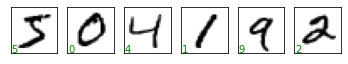

In [5]:
N = 6
plt.figure(figsize=(10,6))
for i in range(N):
    plt.subplot(6, 10, i + 1)
    show(dataset[i][0], dataset[i][1])

### Разбиваем данные

In [6]:
ratio = 0.7
train_size = int(ratio * len(dataset))
test_size = len(dataset) - train_size
train_size, test_size

(42000, 18000)

In [7]:
train, test = data.random_split(dataset, [train_size, test_size])

In [8]:
train = np.array(train)
test = np.array(test)

C:\Users\veter\AppData\Local\Temp/ipykernel_13252/497745403.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  train = np.array(train)
C:\Users\veter\AppData\Local\Temp/ipykernel_13252/497745403.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array(train)
C:\Users\veter\AppData\Local\Temp/ipykernel_13252/497745403.py:2: FutureWarning: The input object 

In [9]:
train.shape

(42000, 2)

In [10]:
x_train = train[:, 0]
y_train = train[:, 1]
y_train = y_train.astype('int')
x_train = np.stack(x_train)
x_train = x_train.reshape((x_train.shape[0], -1))

In [11]:
x_train.shape

(42000, 784)

In [12]:
x_test = test[:, 0]
y_test = test[:, 1]
y_test = y_test.astype('int')
x_test = np.stack(x_test)
x_test = x_test.reshape((x_test.shape[0], -1))

In [13]:
x_test.shape

(18000, 784)

In [14]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
y_train

array([1, 3, 3, ..., 2, 5, 1])

### Подбираем число соседей

In [16]:
neighbors_list = list(range(1, 11)) + list(range(10, 50, 5))
err_train = []
err_test = []
for k in tqdm.notebook.tqdm(neighbors_list):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    err_train.append(np.mean(model.predict(x_train) != y_train))
    err_test.append(np.mean(model.predict(x_test) != y_test))

  0%|          | 0/18 [00:00<?, ?it/s]

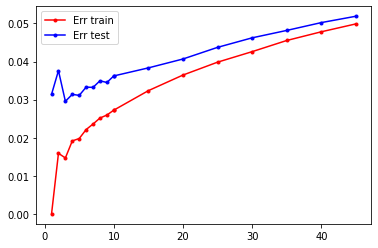

In [17]:
plt.plot(kk, err_train, '.-r', label = 'Err train')
plt.plot(kk, err_test,  '.-b', label = 'Err test')    
plt.legend(loc = 2)

In [18]:
print(min(err_test))
opt_n_neighbors = kk[np.argmin(err_test)]
print(opt_n_neighbors)

0.029555555555555557
3


### Результаты с оптимальным числом соседей

In [19]:
knn = KNeighborsClassifier(n_neighbors = opt_n_neighbors)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### На тестовой выборке

In [20]:
%%time
y_test_predict = knn.predict(x_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

Wall time: 14.1 s


0.029555555555555557

In [21]:
def plot_conf_matrix(predict_labels, true_labels):
    M = confusion_matrix(predict_labels, true_labels)
    M = np.sqrt(M)
    plt.imshow(M, interpolation = 'nearest')
    plt.set_cmap('binary')
    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.xlabel("true digit")
    plt.ylabel("predicted digit")
    plt.colorbar()

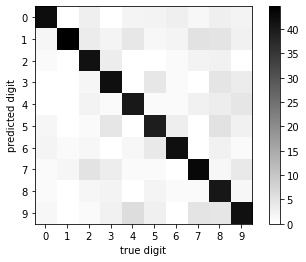

In [22]:
plot_conf_matrix(y_test_predict, y_test)

In [23]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1807
           1       0.95      1.00      0.97      2001
           2       0.99      0.97      0.98      1775
           3       0.97      0.97      0.97      1817
           4       0.97      0.96      0.97      1695
           5       0.96      0.97      0.96      1623
           6       0.98      0.99      0.98      1782
           7       0.97      0.97      0.97      1914
           8       0.99      0.93      0.96      1770
           9       0.95      0.96      0.96      1816

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000



In [24]:
print(accuracy_score(y_test, y_test_predict))

0.9704444444444444


In [25]:
print(f1_score(y_test, y_test_predict, average='macro'))

0.9703047848503064


#### На обучающей выборке

In [26]:
%%time
y_train_predict = knn.predict(x_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

Wall time: 33.6 s


0.014690476190476191

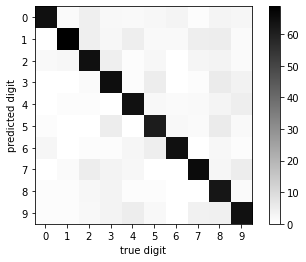

In [27]:
plot_conf_matrix(y_train_predict, y_train)

In [28]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4116
           1       0.98      1.00      0.99      4741
           2       0.99      0.98      0.98      4183
           3       0.98      0.98      0.98      4314
           4       0.99      0.98      0.99      4147
           5       0.98      0.98      0.98      3798
           6       0.99      1.00      0.99      4136
           7       0.98      0.99      0.99      4351
           8       0.99      0.96      0.98      4081
           9       0.98      0.98      0.98      4133

    accuracy                           0.99     42000
   macro avg       0.99      0.99      0.99     42000
weighted avg       0.99      0.99      0.99     42000



In [29]:
print(accuracy_score(y_train, y_train_predict))

0.9853095238095239


In [30]:
print(f1_score(y_train, y_train_predict, average='macro'))

0.9852348789011645


### Заключение
Наибольшая точность была достигнута при 3-х соседях.   
Точность на тестовой выборке: 0.970   
Точность на тренировочной выборке: 0.985